In [227]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.graphics.tsaplots as tsaplots
from collections import OrderedDict
import GPy as gpy
import pandas as pd
import os.path 
import os
import seaborn as sns
import statsmodels.regression.quantile_regression as QuantReg
import tensorflow as tf
import sklearn
import scipy.stats
import scipy.optimize
from scipy.stats import cauchy
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm
from sklearn import preprocessing
%matplotlib inline
import itertools

In [226]:
locParams = np.linspace(-0.5, 0.5, 3)
scaleParams = np.linspace(0.1, 2.5, 3)
gParams = np.linspace(-1., 1., 3)
hParams = 10**np.linspace(-3, -1, 3)

In [228]:
paramList = list( itertools.product( locParams, scaleParams, gParams, hParams))

In [6]:
def qpk(params, z):
    return params[0] + params[1] * (1./params[2] * ( np.exp(params[2] * z ) - 1. ) * np.exp( params[3]*z**2. / 2.))

In [201]:
def estimateTukeyDistribution(Y):
    """
    Tukey Estimation based on Genton's paper 2.1 sect
    """
    p = np.linspace(1e-2, 1-1e-2, 500)
    
    zpk =scipy.stats.norm.ppf( p )
    qhat = np.percentile( Y, p*100 )
    
    def qresiduals( params, zpk, qhat):
        return np.sum((qhat - qpk( params, zpk ))**2)
    
    mu = np.mean(Y)
    std = np.std(Y-mu)
    
    res= scipy.optimize.least_squares( qresiduals, x0=(0, 1, 0.6, 0.2), bounds=( np.array([-np.inf, 1e-2, -np.inf, 1e-2]),\
                                              np.array([np.inf, np.inf, np.inf, np.inf])), args= (zpk, qhat) )
    return res

In [233]:
Z= np.random.weibull(23,size=(15000,))

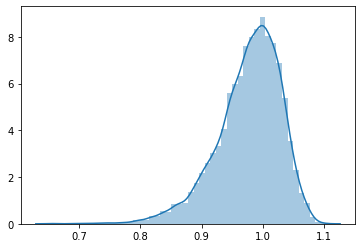

In [234]:
sns.distplot(Z)

In [221]:
resid= estimateTukeyDistribution(Z)

In [222]:
Y_hat = qpk(resid.x, Z)

In [223]:
params = dict( zip(['loc','scale','g','h'], resid.x))

In [224]:
print(params)

{'loc': 0.9796317901185003, 'scale': 0.04873910903894141, 'g': -0.11400408339707611, 'h': 0.0444222301962753}


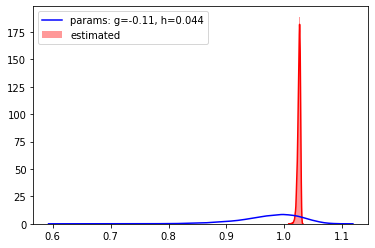

In [225]:
sns.distplot(Y_hat, hist=True, color ='red', label='estimated')
sns.distplot(Z, hist=False, color= 'blue',hist_kws= {"linewidth":2.5}, label ='%s: g=%3.2g, h=%3.2g' % (str('params'),params['g'], params['h']))

In [136]:
def buildTukeyEstimator(data, feature, targetFeature, groupby, display=True):
    """
    data: Pandas Core DataFrame- index, direction, issuer, cbbt mid spread, rs vol, target
    feature: string that is essentially part of the data DataFrame
    targetFeature : string that is essentially part of the data DataFrame
    groupBy: also an array of 2 strings or more!
    """
    results = []
    try:
        group1 = list( data[groupby[0]].dropna().unique().sort_values() )
    except:
        group1 = sorted( list( rfqData[groupBy[0]].dropna().unique() ) )
    try:
        group2 = list(rfqData[groupBy[1]].dropna().unique().sort_values() )
    except:
        group2 = sorted( list (rfqData[groupBy[1]].dropna().unique( ) ) )
    ROWS = len( group1 )
    COLS = len( group2 )
    if display:
        fig, axes = plt.subplots( ROWS, COLS, figsize = (COLS*5, ROWS*5), sharey ='row')
        colorMap = {'ColorOne': 'b', 'ColorTwo':'r'}
    for i, j in tqdm(itertools.product( range(ROWS ), range( COLS)) ):
        lims =(np.inf, -np.inf)
        for side in ['BUY','SIDE']:
            rowGroup, colGroup= group1[i], group2[j]
            
                      
    

In [16]:
columns = ["Asset1", "Asset2", "Asset3"]

df = pd.DataFrame( columns=columns)

In [17]:
df["Asset1"] = np.random.gumbel(size=(5000,))
df["Asset2"] = np.random.normal(size=(5000,))
df["Asset3"] = np.random.poisson(size=(5000,))


In [28]:
def fun(x):
    return np.std(x)
  

In [38]:

tmp  = pd.DataFrame(np.random.randn(2000,2)/10000, 
                    index=pd.date_range('2001-01-01',periods=2000),
                    columns=['A','B'])
tmp['date'] = pd.date_range('2001-01-01',periods=2000)
tmp['ii'] = range(len(tmp))        

In [39]:
tmp.head(4)

,A,B,date,ii
2001-01-01,6.900960e-05,0.000123,2001-01-01,0
2001-01-02,1.692308e-04,0.000021,2001-01-02,1
2001-01-03,4.661730e-07,0.000046,2001-01-03,2
2001-01-04,-2.866790e-05,0.000234,2001-01-04,3


In [195]:
outputTukey = 


In [196]:
outputTukey[2]

 active_mask: array([0, 0, 0, 0])
        cost: 944.016087166255
         fun: array([43.4514922])
        grad: array([4.29013537e-01, 5.67708438e-01, 4.92165921e-01, 3.07414720e+03])
         jac: array([[9.87339020e-03, 1.30653381e-02, 1.13267899e-02, 7.07489443e+01]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 202
        njev: 198
  optimality: 0.5194145629157446
      status: 2
     success: True
           x: array([0.85188026, 0.92493191, 0.43185974, 0.01000003])

In [82]:
params_i = dict( zip(['loc','scale','g','h'], outputTukey[2].x))

In [84]:
params
Y_hat_i = qpk(outputTukey[2].x, Z)

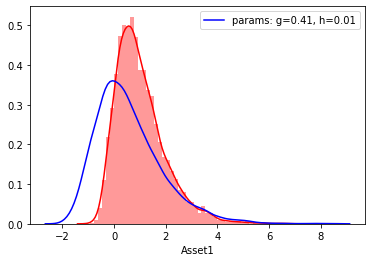

In [87]:
sns.distplot(Y_hat_i, hist=True, color ='red')
sns.distplot(df.Asset1, hist=False, color= 'blue',hist_kws= {"linewidth":2.5}, label ='%s: g=%3.2g, h=%3.2g' % (str('params'),params_i['g'], params_i['h']))